<a href="https://colab.research.google.com/github/Nusrat2002m/ML/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First import necessary libraries**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## **Step 1: Data Loading**

**Load and display the dataset**

In [ ]:
data = pd.read_csv("student_performance.csv")
data

,Student ID,Study_Hours,Attendance,Previous_Grades,Participation_activities,Parent_Edu,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


**Basic information about this dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student ID                40000 non-null  object 
 1   Study_Hours               38005 non-null  float64
 2   Attendance                38008 non-null  float64
 3   Previous_Grades           38006 non-null  float64
 4   Participation_activities  38000 non-null  object 
 5   Parent_Edu                38000 non-null  object 
 6   Passed                    38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


**Missing values check**

In [ ]:
data.isnull().sum()

,0
Student ID,0
Study_Hours,1995
Attendance,1992
Previous_Grades,1994
Participation_activities,2000
Parent_Edu,2000
Passed,2000


## **Step 2: Data Preprocessing**

**Fill missing values**

In [ ]:
data['Participation_activities'] = data['Participation_activities'].fillna(data['Participation_activities'].mode()[0])
data['Parent_Edu'] = data['Parent_Edu'].fillna(data['Parent_Edu'].mode()[0])

data['Study_Hours'] = data['Study_Hours'].fillna(data['Study_Hours'].median())
data['Attendance'] = data['Attendance'].fillna(data['Attendance'].median())
data['Previous_Grades'] = data['Previous_Grades'].fillna(data['Previous_Grades'].median())

** Encode variables**

In [ ]:
data['Participation_activities'] = data['Participation_activities'].map({'Yes': 1, 'No': 0})
data['Parent_Edu'] = data['Parent_Edu'].map({'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4, 'Unknown': -1})

data['Passed'] = data['Passed'].map({'Yes': 1, 'No': 0})

**Drop unnecessary columns**

In [ ]:
data = data.drop(columns=['Student ID'], axis=1)
data

,Study_Hours,Attendance,Previous_Grades,Participation_activities,Parent_Edu,Passed
0,12.5,75.3,75.0,1,3,1.0
1,9.3,95.3,60.6,0,0,0.0
2,13.2,75.3,64.0,0,1,0.0
3,17.6,76.8,62.4,1,2,0.0
4,8.8,89.3,72.7,0,3,0.0
...,...,...,...,...,...,...
39995,15.6,93.8,51.4,1,3,0.0
39996,11.3,66.4,64.2,0,4,1.0
39997,13.1,65.6,38.1,0,2,0.0
39998,14.1,74.9,65.2,1,3,0.0


## **Step 3: Exploratory Data Analysis (EDA)**

**Distribution of the target variable**

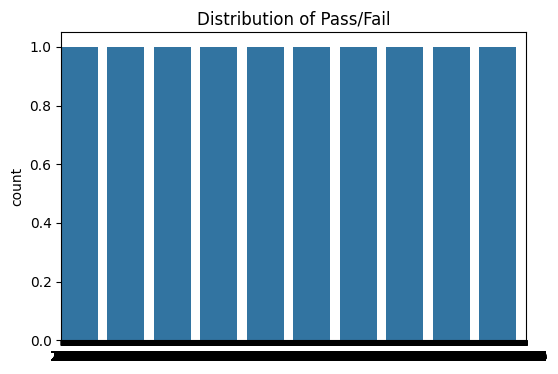

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data['Passed'])
plt.title("Distribution of Pass/Fail")
plt.show()

**Correlation Heatmap**

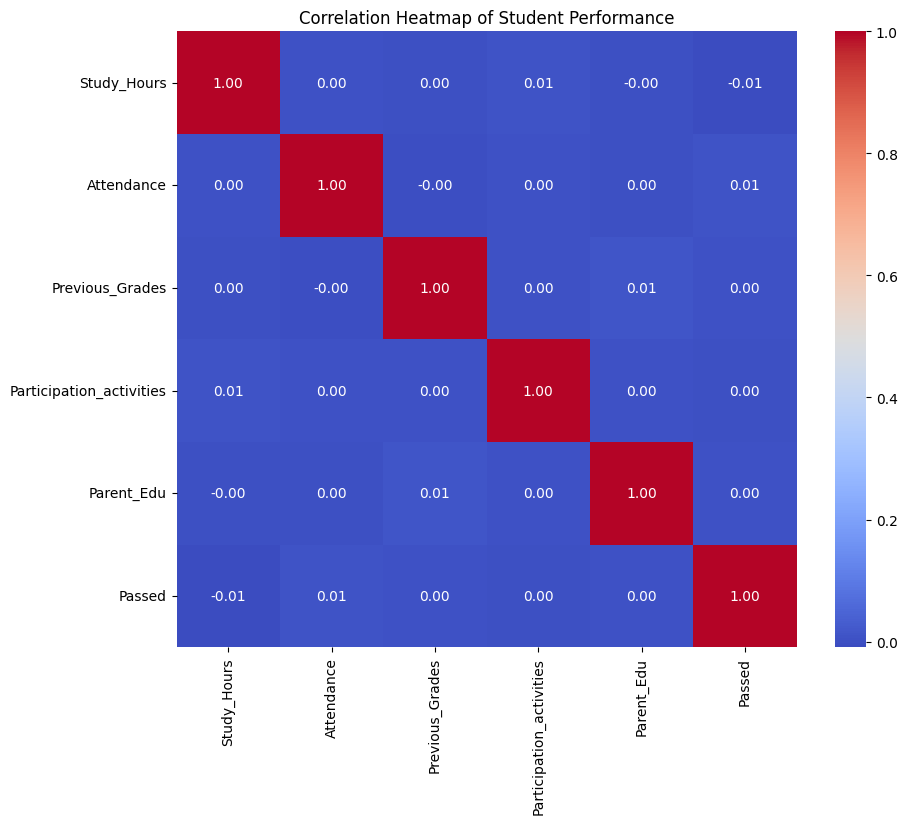

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Student Performance")
plt.show()

**Relationships between features and target**

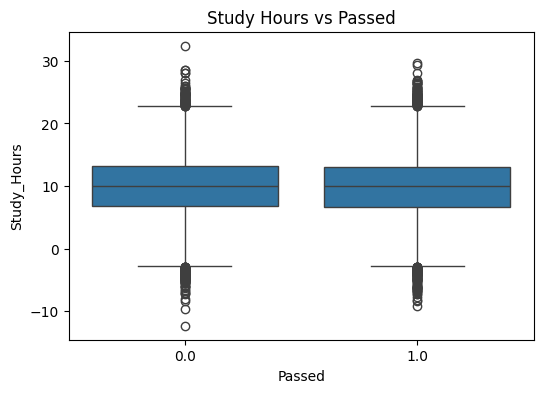

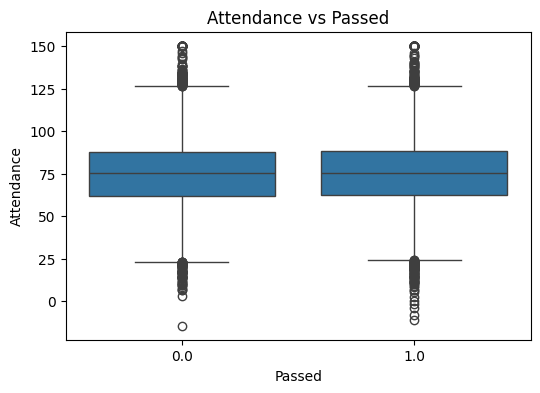

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Passed', y='Study_Hours', data=data)
plt.title("Study Hours vs Passed")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Passed', y='Attendance', data=data)
plt.title("Attendance vs Passed")
plt.show()

## Step 4 : **Feature Scaling**

**Separate features and target variable**

In [ ]:
X = data.drop(columns=['Passed'], axis=1)
y = data['Passed']

**Scale numerical features**

In [ ]:
scaler = StandardScaler()
X[['Study_Hours', 'Attendance', 'Previous_Grades']] = scaler.fit_transform(X[['Study_Hours', 'Attendance', 'Previous_Grades']])

## **Step 5: Train-Test Split**

**Split the dataset into training and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Testing data set for 20% test size:\n',X_test)
print('Training data set for 20% test size:\n',X_train)
print('Dependent class data:\n',y_test)
print('Independent class data:\n',y_train)

Testing data set for 20% test size:
        Study_Hours  Attendance  Previous_Grades  Participation_activities  \
32823     1.414225   -0.109539        -1.400447                         0   
16298    -1.624094   -0.567311         0.899634                         1   
28505     0.455829    0.001132         0.638544                         1   
6689     -0.706481   -0.532098        -0.287705                         0   
26893     1.924010    0.841219         1.241538                         0   
...            ...         ...              ...                       ...   
13618    -1.868791    0.136954        -0.300138                         1   
35165     0.578177    0.936798         0.526648                         0   
16359     1.026788    0.438782        -0.256623                         1   
3842      1.006397   -0.396275         1.023962                         0   
37682    -0.890004    1.731612        -0.884483                         0   

       Parent_Edu  
32823           1 

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## **Step 6: Model Training with Logistic Regression**

**Initialize the Logistic Regression model**

In [ ]:
log_reg=LogisticRegression()
log_reg = LogisticRegression(random_state=42)

**Train the model**

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = y_train.dropna()
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_train = X_train.loc[y_train.index]
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

## **Step 7: Model Evaluation**

**Make predictions on the test set**

In [ ]:
y_pred = log_reg.predict(X_test)

**Evaluate accuracy**

In [ ]:
accuracy = accuracy_score(y_test_clean, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


**Final Classification report**

In [ ]:
not_nan_indices = np.where(np.isfinite(y_test))[0]
y_test = y_test.iloc[not_nan_indices]
y_pred = y_pred[not_nan_indices]
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
classification_report(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49      3794
         1.0       0.50      0.53      0.52      3788

    accuracy                           0.50      7582
   macro avg       0.50      0.50      0.50      7582
weighted avg       0.50      0.50      0.50      7582



'              precision    recall  f1-score   support\n\n         0.0       0.50      0.48      0.49      3794\n         1.0       0.50      0.53      0.52      3788\n\n    accuracy                           0.50      7582\n   macro avg       0.50      0.50      0.50      7582\nweighted avg       0.50      0.50      0.50      7582\n'

**Confusion matrix**


Confusion Matrix:


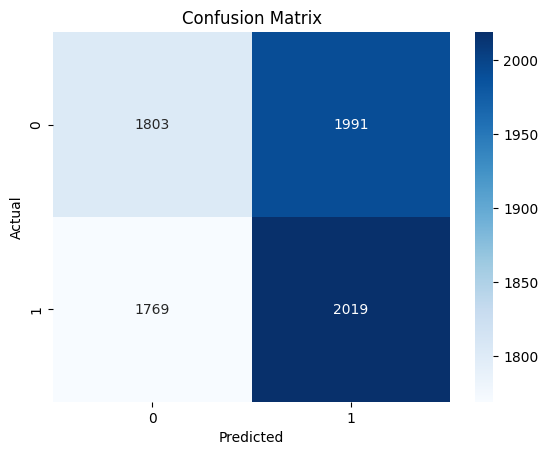

In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**ROC-AUC score**

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.50


**Plot ROC Curve**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Shape of y_test: (7582,)
Shape of y_pred_proba: (7582,)


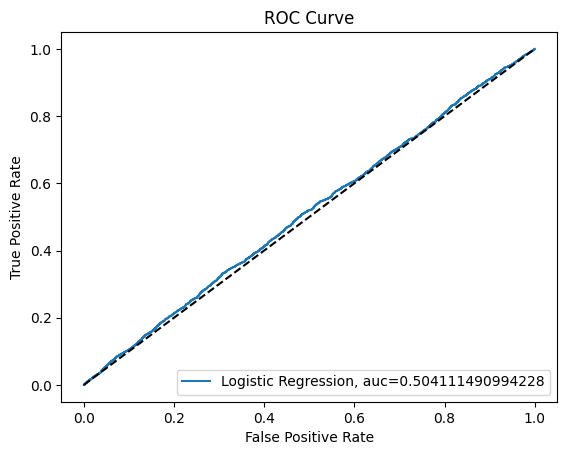

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_proba:", y_pred_proba.shape)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Logistic Regression, auc="+str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **Step 8: Cross-Validation**

**Use cross-validation to verify model stability**

In [ ]:
y = y[~np.isnan(y)]
y = pd.Series(y, index=X.index)
X = X.loc[y.index]
mask = ~np.isnan(y)
y = y[mask]
X = X[mask]
imputer = SimpleImputer(strategy='mean')
y_array = y.to_numpy()
y = imputer.fit_transform(y_array.reshape(-1, 1))
y = y.ravel()
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.5025     0.50763158 0.50052632 0.50960526 0.50486842]
Mean Cross-Validation Score: 0.51


## **Step 9: Feature Interpretation**

**Model Coefficients**

In [ ]:
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
coefficients


Feature Coefficients:


,Coefficient
Parent_Edu,0.020759
Participation_activities,0.005305
Previous_Grades,0.000862
Attendance,-0.003646
Study_Hours,-0.021470


## **Step 10: Conclusion**

In [ ]:
print("\nConclusion:")
print("The logistic regression model predicts whether a student will pass or fail based on various factors.")
print(f"The model achieved an accuracy of {accuracy:.2f} and an ROC-AUC score of {roc_auc:.2f}.")
print("Important features that influence student performance include Study Hours, Attendance Rate, and Previous Grades.")


Conclusion:
The logistic regression model predicts whether a student will pass or fail based on various factors.
The model achieved an accuracy of 0.50 and an ROC-AUC score of 0.50.
Important features that influence student performance include Study Hours, Attendance Rate, and Previous Grades.
